# Derek Lankeaux- STAT 790: Capstone in Applied Statistics

Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings  as ws
ws.filterwarnings("ignore")

In [2]:
WBCD = pd.read_csv("Original WBCD.csv")
WBCD.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         13.50          15.64            86.97       549.1            0.1385   
1         11.88          22.94            78.28       424.8            0.1213   
2         12.41          26.44            79.93       471.4            0.1369   
3         11.92          15.77            76.53       434.0            0.1367   
4         16.20          15.73           104.50       819.1            0.1126   

   compactness_worst  concavity_worst  points_worst  symmetry_worst  \
0             0.1266          0.12420       0.09391          0.2827   
1             0.2515          0.19160       0.07926          0.2940   
2             0.1482          0.10670       0.07431          0.2998   
3             0.1822          0.08669       0.08611          0.2102   
4             0.1737          0.13620       0.08178          0.2487   

   dimension_worst  
0          0.06771  
1          0.07587  
2          0.07881  
3          0.06784  
4          0.06766  

[5 rows x 32 columns]

Descriptive statistics.

In [3]:
WBCD.describe().T

count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se       569.0  2.866059e+00  2.021855e+00     0.757000   
area_se            569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se      569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se     569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se       569.0  3.189372e-02  3.018606e-02     0.000000   
points_se          569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se        569.0  2.054230e-02  8.266372e-03     0.007882   
dimension_se       569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst       569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst      569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst    569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst         569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst   569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst  569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst    569.0  2.721885e-01  2.086243e-01     0.000000   
points_worst       569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst     569.0  2.900756e-01  6.186747e-02     0.156500   
dimension_worst    569.0  8.394582e-02  1.806127e-02     0.055040   

                             25%            50%           75%           max  
id                 869218.000000  906024.000000  8.813129e+06  9.113205e+08  
radius_mean            11.700000      13.370000  1.578000e+01  2.811000e+01  
texture_mean           16.170000      18.840000  2.180000e+01  3.928000e+01  
perimeter_mean         75.170000      86.240000  1.041000e+02  1.885000e+02  
area_mean             420.300000     551.100000  7.827000e+02  2.501000e+03  
smoothness_mean         0.086370       0.095870  1.053000e-01  1.634000e-01  
compactness_mean        0.064920       0.092630  1.304000e-01  3.454000e-01  
concavity_mean          0.029560       0.061540  1.307000e-01  4.268000e-01  
points_mean             0.020310       0.033500  7.400000e-02  2.012000e-01  
symmetry_mean           0.161900       0.179200  1.957000e-01  3.040000e-01  
dimension_mean          0.057700       0.061540  6.612000e-02  9.744000e-02  
radius_se               0.232400       0.324200  4.789000e-01  2.873000e+00  
texture_se              0.833900       1.108000  1.474000e+00  4.885000e+00  
perimeter_se            1.606000       2.287000  3.357000e+00  2.198000e+01  
area_se                17.850000      24.530000  4.519000e+01  5.422000e+02  
smoothness_se           0.005169       0.006380  8.146000e-03  3.113000e-02  
compactness_se          0.013080       0.020450  3.245000e-02  1.354000e-01  
concavity_se            0.015090       0.025890  4.205000e-02  3.960000e-01  
points_se               0.007638       0.010930  1.471000e-02  5.279000e-02  
symmetry_se             0.015160       0.018730  2.348000e-02  7.895000e-02  
dimension_se            0.002248       0.003187  4.558000e-03  2.984000e-02  
radius_worst           13.010000      14.970000  1.879000e+01  3.604000e+01  
texture_worst   

Value counts.

In [4]:
WBCD['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
WBCD['diagnosis'] = WBCD['diagnosis'].map({'B': 0, 'M': 1})

In [6]:
WBCD.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402          0        12.32         12.39           78.85      464.1   
1   8910251          0        10.60         18.95           69.28      346.4   
2    905520          0        11.04         16.83           70.92      373.2   
3    868871          0        11.28         13.39           73.00      384.8   
4   9012568          0        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         13.50          15.64            86.97       549.1            0.1385   
1         11.88          22.94            78.28       424.8            0.1213   
2         12.41          26.44            79.93       471.4            0.1369   
3         11.92          15.77            76.53       434.0            0.1367   
4         16.20          15.73           104.50       819.1            0.1126   

   compactness_worst  concavity_worst  points_worst  symmetry_worst  \
0             0.1266          0.12420       0.09391          0.2827   
1             0.2515          0.19160       0.07926          0.2940   
2             0.1482          0.10670       0.07431          0.2998   
3             0.1822          0.08669       0.08611          0.2102   
4             0.1737          0.13620       0.08178          0.2487   

   dimension_worst  
0          0.06771  
1          0.07587  
2          0.07881  
3          0.06784  
4          0.06766  

[5 rows x 32 columns]

Data Visualization.

a. Dependent Variable distribution

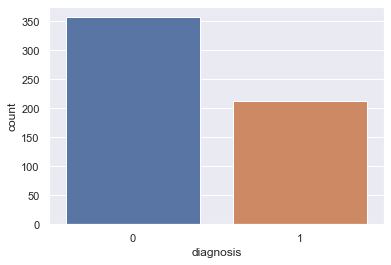

In [7]:
sns.set()
sns.countplot(WBCD["diagnosis"])
plt.show()

b. Histograms of remaining variables' univariate distributions.

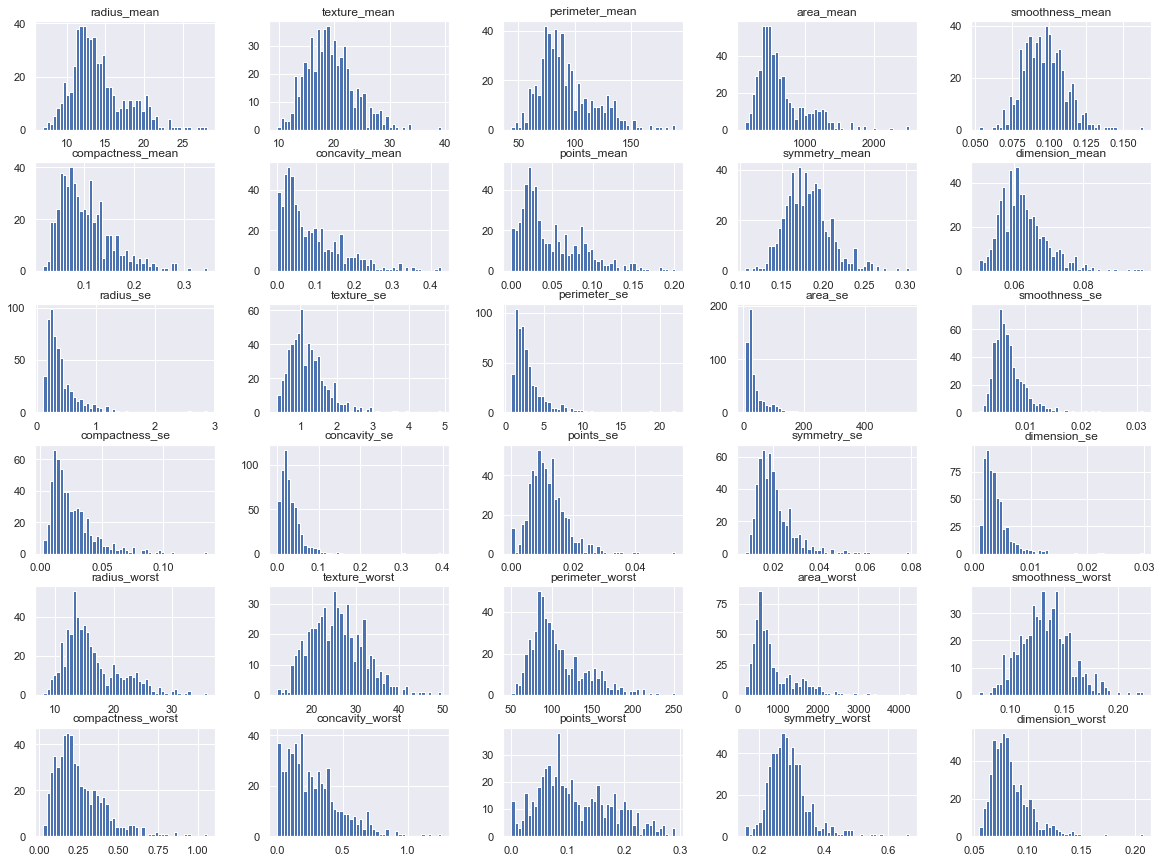

In [8]:
WBCD.iloc[:,2:32].hist(bins=50, figsize=(20, 15))
plt.show()

c. Boxplots of remaining variables' univariate distributions.

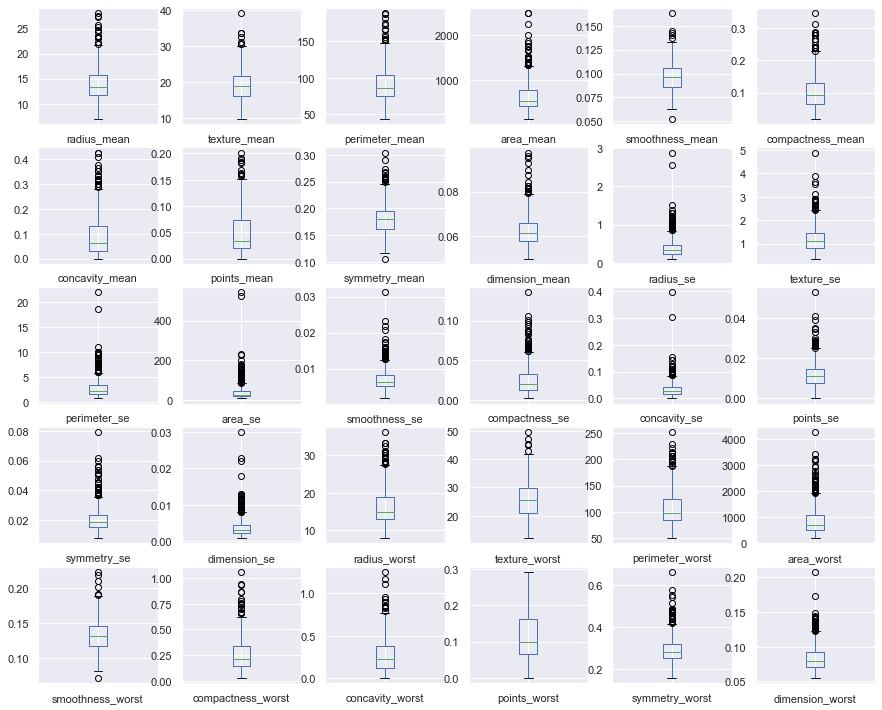

In [9]:
WBCD.iloc[:,2:32].plot(kind='box', subplots=True, layout=(6, 6), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

New correlation structure.

In [10]:
WBCD.iloc[:,2:32].corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean           1.000000      0.323782        0.997855   0.987357   
texture_mean          0.323782      1.000000        0.329533   0.321086   
perimeter_mean        0.997855      0.329533        1.000000   0.986507   
area_mean             0.987357      0.321086        0.986507   1.000000   
smoothness_mean       0.170581     -0.023389        0.207278   0.177028   
compactness_mean      0.506124      0.236702        0.556936   0.498502   
concavity_mean        0.676764      0.302418        0.716136   0.685983   
points_mean           0.822529      0.293464        0.850977   0.823269   
symmetry_mean         0.147741      0.071401        0.183027   0.151293   
dimension_mean       -0.311631     -0.076437       -0.261477  -0.283110   
radius_se             0.679090      0.275869        0.691765   0.732562   
texture_se           -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se          0.674172      0.281673        0.693135   0.726628   
area_se               0.735864      0.259845        0.744983   0.800086   
smoothness_se        -0.222600      0.006614       -0.202694  -0.166777   
compactness_se        0.206000      0.191975        0.250744   0.212583   
concavity_se          0.194204      0.143293        0.228082   0.207660   
points_se             0.376169      0.163851        0.407217   0.372320   
symmetry_se          -0.104321      0.009127       -0.081629  -0.072497   
dimension_se         -0.042641      0.054458       -0.005523  -0.019887   
radius_worst          0.969539      0.352573        0.969476   0.962746   
texture_worst         0.297008      0.912045        0.303038   0.287489   
perimeter_worst       0.965137      0.358040        0.970387   0.959120   
area_worst            0.941082      0.343546        0.941550   0.959213   
smoothness_worst      0.119616      0.077503        0.150549   0.123523   
compactness_worst     0.413463      0.277830        0.455774   0.390410   
concavity_worst       0.526911      0.301025        0.563879   0.512606   
points_worst          0.744214      0.295316        0.771241   0.722017   
symmetry_worst        0.163953      0.105008        0.189115   0.143570   
dimension_worst       0.007066      0.119205        0.051019   0.003738   

                   smoothness_mean  compactness_mean  concavity_mean  \
radius_mean               0.170581          0.506124        0.676764   
texture_mean             -0.023389          0.236702        0.302418   
perimeter_mean            0.207278          0.556936        0.716136   
area_mean                 0.177028          0.498502        0.685983   
smoothness_mean           1.000000          0.659123        0.521984   
compactness_mean          0.659123          1.000000        0.883121   
concavity_mean            0.521984          0.883121        1.000000   
points_mean               0.553695          0.831135        0.921391   
symmetry_mean             0.557775          0.602641        0.500667   
dimension_mean            0.584792          0.565369        0.336783   
radius_se                 0.301467          0.497473        0.631925   
texture_se                0.068406          0.046205        0.076218   
perimeter_se              0.296092          0.548905        0.660391   
area_se                   0.246552          0.455653        0.617427   
smoothness_se             0.332375          0.135299        0.098564   
compactness_se            0.318943          0.738722        0.670279   
concavity_se              0.248396          0.570517        0.691270   
points_se                 0.380676          0.642262        0.683260   
symmetry_se               0.200774          0.229977        0.178009   
dimension_se              0.283607          0.507318        0.449301   
radius_worst              0.213120          0.535315        0.688236   
texture_worst             0.036072          0.248133        0.299879   
perimeter_worst           0.238853   

Correlogram.

<AxesSubplot:>

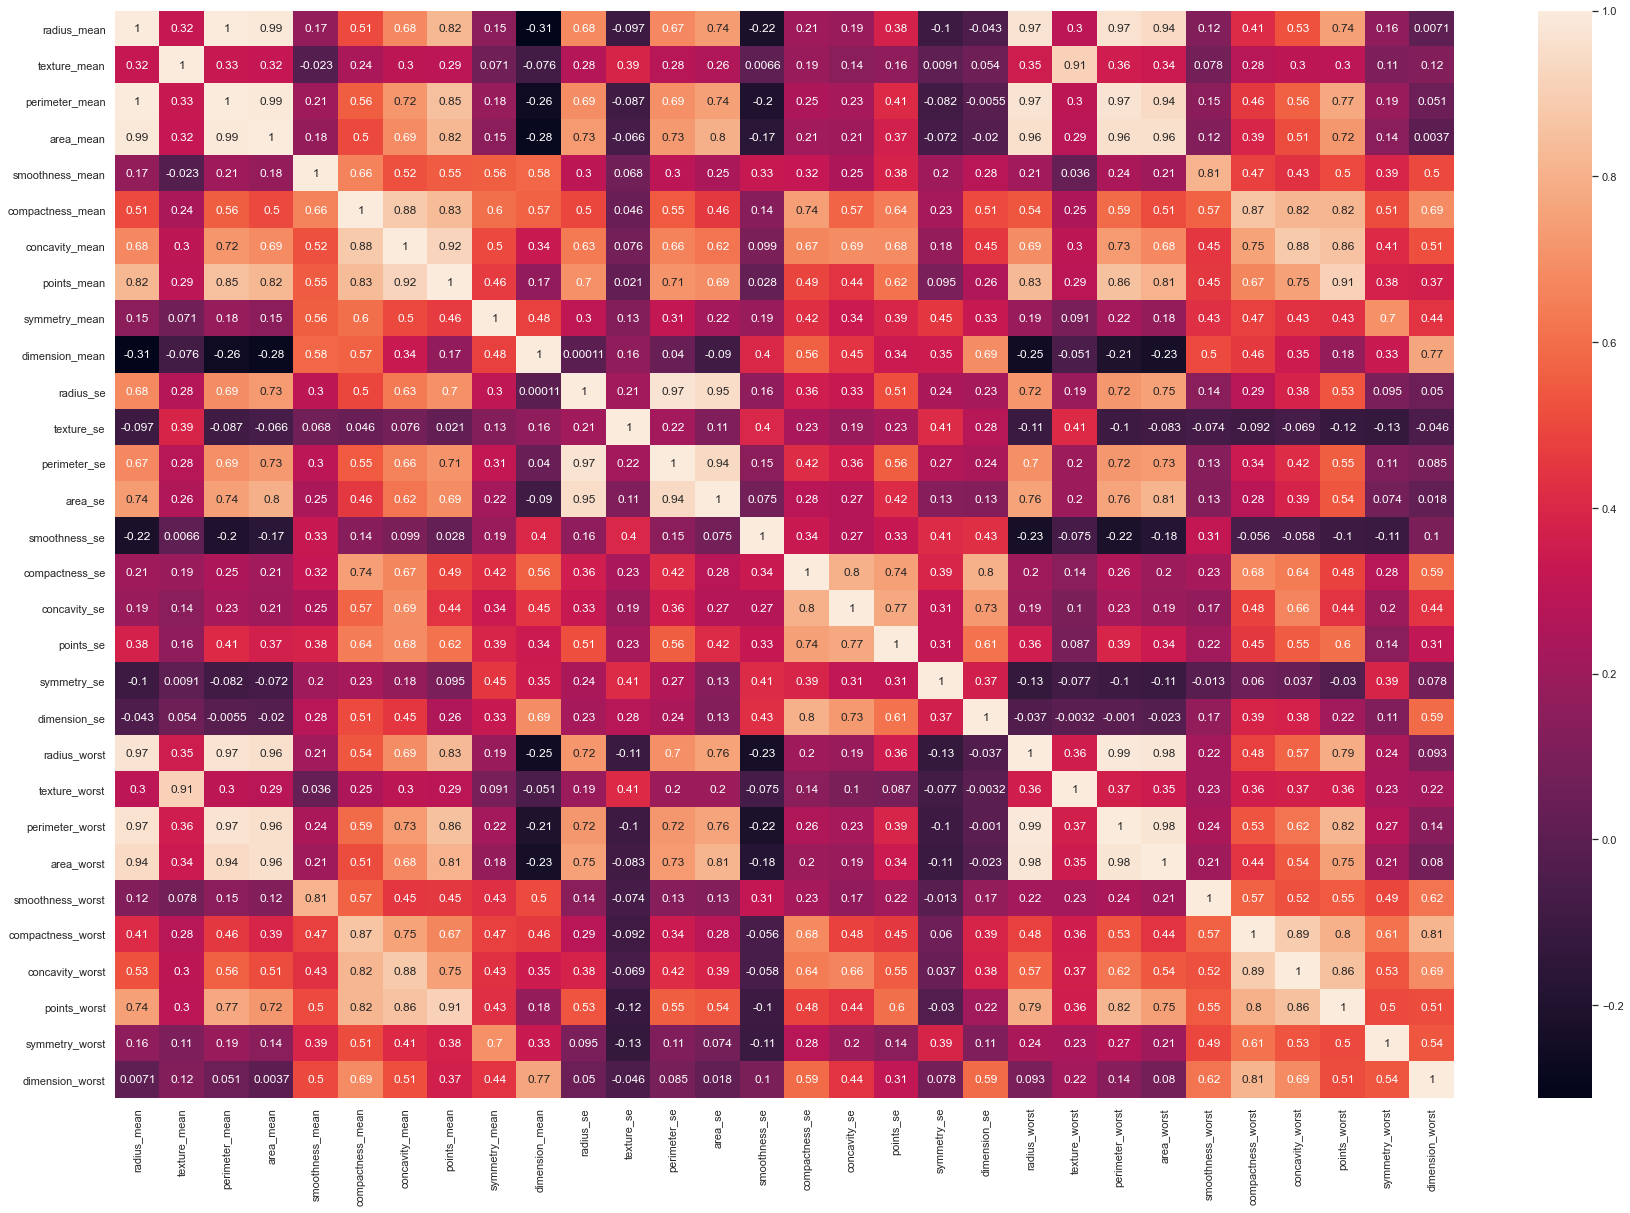

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(WBCD.iloc[:,2:32].corr(), annot = True)

In [12]:
WBCD

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402          0        12.32         12.39           78.85   
1      8910251          0        10.60         18.95           69.28   
2       905520          0        11.04         16.83           70.92   
3       868871          0        11.28         13.39           73.00   
4      9012568          0        15.19         13.21           97.65   
..         ...        ...          ...           ...             ...   
564  911320502          0        13.17         18.22           84.28   
565     898677          0        10.26         14.71           66.20   
566     873885          1        15.28         22.41           98.92   
567     911201          0        14.53         13.98           93.86   
568    9012795          1        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280           0.06981         0.03987   
1        346.4          0.09688           0.11470         0.06387   
2        373.2          0.10770           0.07804         0.03046   
3        384.8          0.11640           0.11360         0.04635   
4        711.8          0.07963           0.06934         0.03393   
..         ...              ...               ...             ...   
564      537.3          0.07466           0.05994         0.04859   
565      321.6          0.09882           0.09159         0.03581   
566      710.6          0.09057           0.10520         0.05375   
567      644.2          0.10990           0.09242         0.06895   
568     1386.0          0.10010           0.15150         0.19320   

     points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0        0.03700  ...         13.50          15.64            86.97   
1        0.02642  ...         11.88          22.94            78.28   
2        0.02480  ...         12.41          26.44            79.93   
3        0.04796  ...         11.92          15.77            76.53   
4        0.02657  ...         16.20          15.73           104.50   
..           ...  ...           ...            ...              ...   
564      0.02870  ...         14.90          23.89            95.10   
565      0.02037  ...         10.88          19.48            70.89   
566      0.03263  ...         17.80          28.03           113.80   
567      0.06495  ...         15.80          16.93           103.10   
568      0.12550  ...         22.69          21.84           152.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         549.1            0.1385             0.1266          0.12420   
1         424.8            0.1213             0.2515          0.19160   
2         471.4            0.1369             0.1482          0.10670   
3         434.0            0.1367             0.1822          0.08669   
4         819.1            0.1126             0.1737          0.13620   
..          ...               ...                ...              ...   
564       687.6            0.1282             0.1965          0.18760   
565       357.1            0.1360             0.1636          0.07162   
566       973.1            0.1301             0.3299          0.36300   
567       749.9            0.1347             0.1478          0.13730   
568      1535.0            0.1192             0.2840          0.40240   

     points_worst  symmetry_worst  dimension_worst  
0         0.09391          0.2827          0.06771  
1         0.07926          0.2940          0.07587  
2         0.07431          0.2998          0.07881  
3         0.08611          0.2102          0.06784  
4         0.08178          0.2487          0.06766  
..            ...             ...              ...  
564       0.10450          0.2235          0.06925  
565       0.04074          0.2434          0.08488  
566       0.12260          0.3175          0.09772  
567       0.10690          0.2606          0.07810  
568  

Feature scaling

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = WBCD.iloc[:,2:32]
y = WBCD.iloc[:,1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[-0.51329651, -1.60559452, -0.54037561, ..., -0.31513306,
        -0.11932056, -0.89972108],
       [-1.00180093, -0.07903849, -0.93456583, ..., -0.53820271,
         0.06348865, -0.44752801],
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       ...,
       [ 0.32738551,  0.72612674,  0.28631171, ...,  0.12171802,
         0.44366709,  0.7633076 ],
       [ 0.11437486, -1.23559085,  0.07788929, ..., -0.11733956,
        -0.47685008, -0.32395074],
       [ 2.05703196, -0.97495933,  2.03195239, ...,  1.24848623,
        -0.27624528,  0.15040866]])

PCA on WBCD

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


# Perform PCA on the WBCD dataset
n_components = 2 
pca = PCA(n_components=n_components)
X_wbcd_pca = pca.fit_transform(X_scaled)

# Create DataFrames for the original WBCD and the PCA components
wbcd_df = pd.DataFrame(X)
pca_df = pd.DataFrame(X_wbcd_pca, columns=[f'PCA{i}' for i in range(1, n_components + 1)])

# Combine the WBCD dataset and PCA components
WBCD_new = pd.concat([y,wbcd_df,pca_df], axis=1)
WBCD_new

Machine Learning

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
X = WBCD_new.iloc[:,1:33]
y = WBCD_new.iloc[:,0]

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [19]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          12.32         12.39           78.85      464.1          0.10280   
1          10.60         18.95           69.28      346.4          0.09688   
2          11.04         16.83           70.92      373.2          0.10770   
3          11.28         13.39           73.00      384.8          0.11640   
4          15.19         13.21           97.65      711.8          0.07963   
..           ...           ...             ...        ...              ...   
564        13.17         18.22           84.28      537.3          0.07466   
565        10.26         14.71           66.20      321.6          0.09882   
566        15.28         22.41           98.92      710.6          0.09057   
567        14.53         13.98           93.86      644.2          0.10990   
568        21.37         15.10          141.30     1386.0          0.10010   

     compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0             0.06981         0.03987      0.03700         0.1959   
1             0.11470         0.06387      0.02642         0.1922   
2             0.07804         0.03046      0.02480         0.1714   
3             0.11360         0.04635      0.04796         0.1771   
4             0.06934         0.03393      0.02657         0.1721   
..                ...             ...          ...            ...   
564           0.05994         0.04859      0.02870         0.1454   
565           0.09159         0.03581      0.02037         0.1633   
566           0.10520         0.05375      0.03263         0.1727   
567           0.09242         0.06895      0.06495         0.1650   
568           0.15150         0.19320      0.12550         0.1973   

     dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.05955  ...         13.50          15.64            86.97   
1           0.06491  ...         11.88          22.94            78.28   
2           0.06340  ...         12.41          26.44            79.93   
3           0.06072  ...         11.92          15.77            76.53   
4           0.05544  ...         16.20          15.73           104.50   
..              ...  ...           ...            ...              ...   
564         0.05549  ...         14.90          23.89            95.10   
565         0.07005  ...         10.88          19.48            70.89   
566         0.06317  ...         17.80          28.03           113.80   
567         0.06121  ...         15.80          16.93           103.10   
568         0.06183  ...         22.69          21.84           152.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         549.1            0.1385             0.1266          0.12420   
1         424.8            0.1213             0.2515          0.19160   
2         471.4            0.1369             0.1482          0.10670   
3         434.0            0.1367             0.1822          0.08669   
4         819.1            0.1126             0.1737          0.13620   
..          ...               ...                ...              ...   
564       687.6            0.1282             0.1965          0.18760   
565       357.1            0.1360             0.1636          0.07162   
566       973.1            0.1301             0.3299          0.36300   
567       749.9            0.1347             0.1478          0.13730   
568      1535.0            0.1192             0.2840          0.40240   

     points_worst  symmetry_worst  dimension_worst  
0         0.09391          0.2827          0.06771  
1         0.07926          0.2940          0.07587  
2         0.07431          0.2998          0.07881  
3         0.08611          0.2102          0.06784  
4         0.08178          0.2487          0.06766  
..            ...             ...              ...  
564       0.10450          0.2235          0.06925  
565       0.04074          0.2434          0.0848

a. Random Forest classifier

In [20]:
WBCD_new

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        12.32         12.39           78.85      464.1   
1            0        10.60         18.95           69.28      346.4   
2            0        11.04         16.83           70.92      373.2   
3            0        11.28         13.39           73.00      384.8   
4            0        15.19         13.21           97.65      711.8   
..         ...          ...           ...             ...        ...   
564          0        13.17         18.22           84.28      537.3   
565          0        10.26         14.71           66.20      321.6   
566          1        15.28         22.41           98.92      710.6   
567          0        14.53         13.98           93.86      644.2   
568          1        21.37         15.10          141.30     1386.0   

     smoothness_mean  compactness_mean  concavity_mean  points_mean  \
0            0.10280           0.06981         0.03987      0.03700   
1            0.09688           0.11470         0.06387      0.02642   
2            0.10770           0.07804         0.03046      0.02480   
3            0.11640           0.11360         0.04635      0.04796   
4            0.07963           0.06934         0.03393      0.02657   
..               ...               ...             ...          ...   
564          0.07466           0.05994         0.04859      0.02870   
565          0.09882           0.09159         0.03581      0.02037   
566          0.09057           0.10520         0.05375      0.03263   
567          0.10990           0.09242         0.06895      0.06495   
568          0.10010           0.15150         0.19320      0.12550   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.1959  ...         13.50          15.64            86.97   
1           0.1922  ...         11.88          22.94            78.28   
2           0.1714  ...         12.41          26.44            79.93   
3           0.1771  ...         11.92          15.77            76.53   
4           0.1721  ...         16.20          15.73           104.50   
..             ...  ...           ...            ...              ...   
564         0.1454  ...         14.90          23.89            95.10   
565         0.1633  ...         10.88          19.48            70.89   
566         0.1727  ...         17.80          28.03           113.80   
567         0.1650  ...         15.80          16.93           103.10   
568         0.1973  ...         22.69          21.84           152.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         549.1            0.1385             0.1266          0.12420   
1         424.8            0.1213             0.2515          0.19160   
2         471.4            0.1369             0.1482          0.10670   
3         434.0            0.1367             0.1822          0.08669   
4         819.1            0.1126             0.1737          0.13620   
..          ...               ...                ...              ...   
564       687.6            0.1282             0.1965          0.18760   
565       357.1            0.1360             0.1636          0.07162   
566       973.1            0.1301             0.3299          0.36300   
567       749.9            0.1347             0.1478          0.13730   
568      1535.0            0.1192             0.2840          0.40240   

     points_worst  symmetry_worst  dimension_worst  
0         0.09391          0.2827          0.06771  
1         0.07926          0.2940          0.07587  
2         0.07431          0.2998          0.07881  
3         0.08611          0.2102          0.06784  
4         0.08178          0.2487          0.06766  
..            ...             ...              ...  
564       0.10450          0.2235          0.06925  
565       0.04074          0.2434          0.08488  
566       0.12260          0.3175          0.09772  
567

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = WBCD_new.iloc[:,1:33]
y = WBCD_new.iloc[:,0]

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
rf_classifier = RandomForestClassifier(max_depth = 10, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [23]:
rf_classifier

RandomForestClassifier(max_depth=10, n_estimators=200)

b. Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X = WBCD_new.iloc[:,1:32]
y = WBCD_new.iloc[:,0]

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [25]:
GBC = GradientBoostingClassifier(learning_rate = 0.1, max_depth =  3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)

In [26]:
GBC

GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=2,
                           n_estimators=200)

c. AdaBoost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = WBCD_new.iloc[:,1:32]
y = WBCD_new.iloc[:,0]

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 200}


In [28]:
AB = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), learning_rate = 1.0, n_estimators = 200)

In [29]:
AB

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

d. Bagging Classifier

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = WBCD_new.iloc[:,1:32]
y = WBCD_new.iloc[:,0]
# Define the parameter grid for the base estimator
param_grid = {
    'base_estimator__max_depth': [None, 10, 20],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
}

# Create the base estimator with default hyperparameters
base_estimator = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'base_estimator__max_depth': None, 'max_samples': 0.9, 'n_estimators': 200}


In [31]:
BC = BaggingClassifier(max_samples = 0.9, n_estimators = 200)

In [32]:
BC

BaggingClassifier(max_samples=0.9, n_estimators=200)

In [33]:
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print a classification report (includes precision, recall, and F1 score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.96
Precision: 0.92
Recall: 0.97
F1 Score: 0.94
Confusion Matrix:
[[105   5]
 [  2  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       110
           1       0.92      0.97      0.94        61

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = WBCD_new.iloc[:,1:34]
y = WBCD_new.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a classifier (Random Forest, for example)
GBC.fit(X_train, y_train)

# Make predictions on the test data
y_pred = GBC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print a classification report (includes precision, recall, and F1 score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[72  2]
 [ 2 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [35]:
AB.fit(X_train, y_train)

# Make predictions on the test data
y_pred = AB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print a classification report (includes precision, recall, and F1 score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.99
Confusion Matrix:
[[74  0]
 [ 1 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [36]:
BC.fit(X_train, y_train)

# Make predictions on the test data
y_pred = BC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print a classification report (includes precision, recall, and F1 score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.96
Precision: 0.93
Recall: 0.97
F1 Score: 0.95
Confusion Matrix:
[[71  3]
 [ 1 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.93      0.97      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X = WBCD_new.iloc[:,1:34]
y = WBCD_new.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train different classifiers
classifiers = {
    'Random Forest': rf_classifier,
    'Gradient Boosting': GBC,
    'AdaBoost': AB,
    'Bagging': BC
}

metrics = []

# Calculate and consolidate metrics for each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to consolidate the metrics
metrics_df = pd.DataFrame(metrics)

# Print the consolidated metrics
print("Consolidated Metrics:")
print(metrics_df)


Consolidated Metrics:
          Classifier  Accuracy  Precision  Recall  F1 Score
0      Random Forest  0.964912   0.928571   0.975  0.951220
1  Gradient Boosting  0.973684   0.951220   0.975  0.962963
2           AdaBoost  0.991228   1.000000   0.975  0.987342
3            Bagging  0.982456   0.975000   0.975  0.975000
